In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px


In [2]:
#Importing the dataset
df_telsa =pd.read_csv("../../../data/TSLA.csv")

# look the data set
df_telsa.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [3]:
#Checking the dtypes of all the columns

df_telsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       639 non-null    object 
 1   High       639 non-null    float64
 2   Low        639 non-null    float64
 3   Open       639 non-null    float64
 4   Close      639 non-null    float64
 5   Volume     639 non-null    float64
 6   Adj Close  639 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.1+ KB


In [4]:
#Conversion data type column -  date from object to Datetime

df_telsa["Date"]=pd.to_datetime(df_telsa["Date"])

In [5]:
#Checking null value

df_telsa.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
# make 2 column - Year & Month 

df_telsa["Year"]=df_telsa["Date"].dt.year
df_telsa["Month"]=df_telsa["Date"].dt.month

df_telsa.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,2019,9
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,2019,10
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,2019,10
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,2019,10
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,2019,10


Visualization and Analysis

Text(0.5, 1.0, 'The relation between Date of High & low Value')

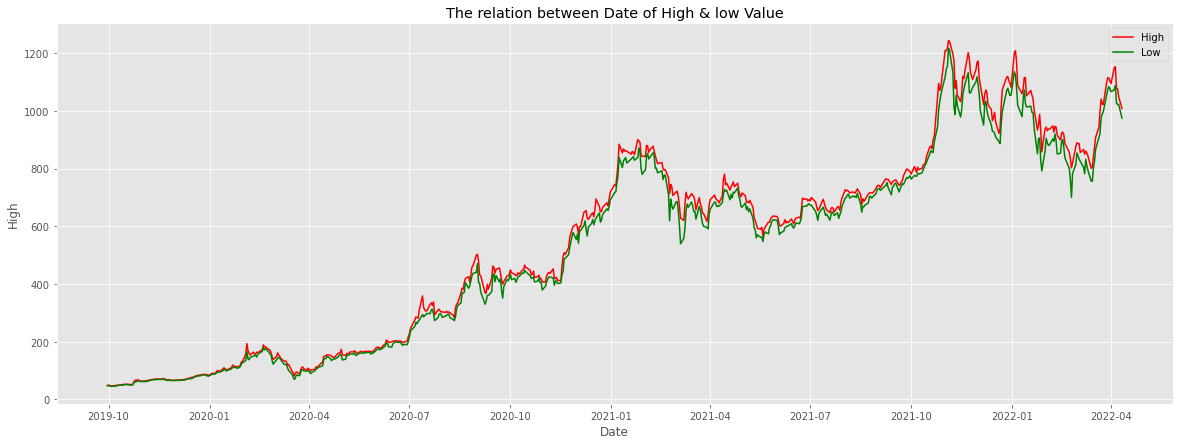

In [7]:
# show the relation between Date of High & Low value

plt.figure(figsize=(20,7))
sns.lineplot(data=df_telsa,x="Date",y="High",color="red",label="High")
sns.lineplot(data=df_telsa,x="Date",y="Low",color="green",label="Low")

plt.title("The relation between Date of High & low Value")

Text(0.5, 1.0, 'The relation between  Date of Open & Close value')

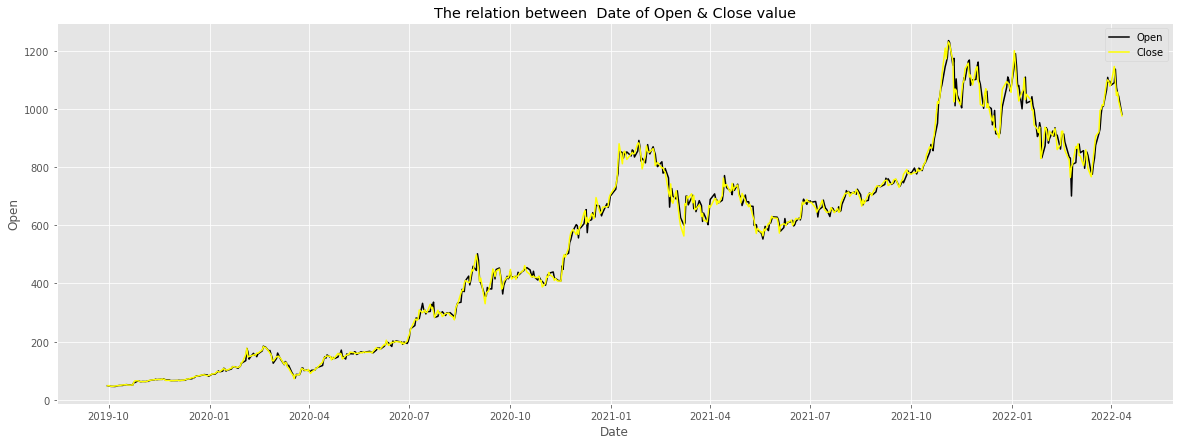

In [8]:
# show the relation between Date of Open & Close value

plt.figure(figsize=(20,7))
sns.lineplot(data=df_telsa,x="Date",y="Open",color="black",label="Open")
sns.lineplot(data=df_telsa,x="Date",y="Close",color="yellow",label="Close")

plt.title("The relation between  Date of Open & Close value")

Text(0.5, 1.0, 'The relation between  Date of Volume')

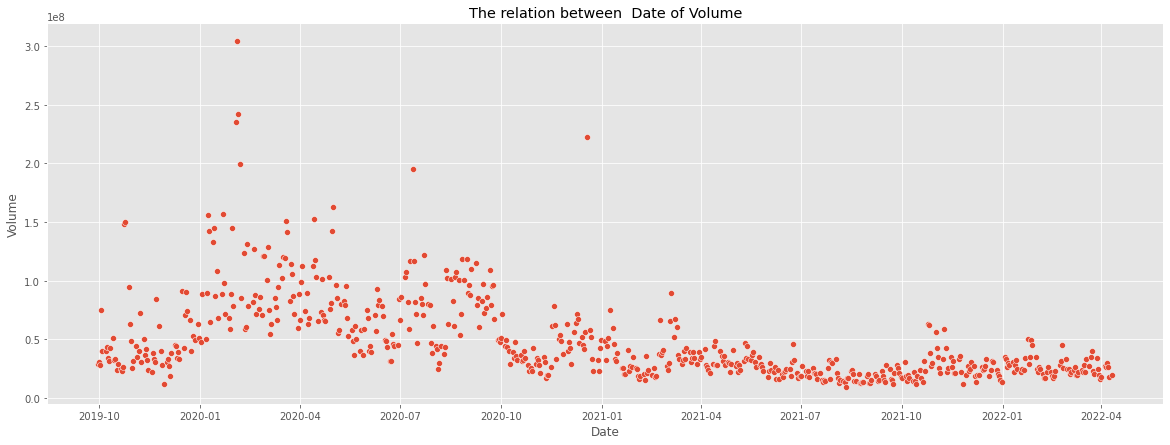

In [9]:
# show the relation between Date of Volume     

plt.figure(figsize=(20,7))
sns.scatterplot(data=df_telsa,x="Date",y="Volume",)

plt.title("The relation between  Date of Volume")

In [10]:
# make group by 

group_by_a=df_telsa.groupby("Year")['High','Low','Open','Close'].mean().round(2)
group_by_a

/var/folders/n2/d4wp9tmj61j7ywkmw1k5bpg40000gn/T/ipykernel_3618/1348404258.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_by_a=df_telsa.groupby("Year")['High','Low','Open','Close'].mean().round(2)


,High,Low,Open,Close
Year,,,,
2019,65.61,63.69,64.49,64.81
2020,297.29,280.70,289.11,290.00
2021,795.73,762.71,779.84,779.99
2022,974.00,921.28,948.64,947.23


Analysis Results

Data consists of the monthly stock price of Tesla from 9/30/2019 to 4/11/2022. The data is arranged in 7 columns
Date - High - Low - Open - Close - Volume - Adj Close
- We see not a high difference between High & Low price , also increasing price by the time

- We see not a high difference between Open & Close price , also increasing price by the time

- We see the price Volume stable after 4-2021

- All the value price also increasing price by the time

In [11]:
#Importing the basic librarires for building model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

/opt/homebrew/Caskroom/miniforge/base/envs/untitled/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [12]:
# Drop the columns , I don't using - the column Adj Close the same the column Close
df_telsa.drop(columns=["Date","Adj Close"],inplace=True)

df_telsa.head()

,High,Low,Open,Close,Volume,Year,Month
0,48.796001,47.222000,48.599998,48.174000,29399000.0,2019,9
1,49.189999,47.826000,48.299999,48.938000,30813000.0,2019,10
2,48.930000,47.886002,48.658001,48.625999,28157000.0,2019,10
3,46.896000,44.855999,46.372002,46.605999,75422500.0,2019,10
4,46.956001,45.613998,46.321999,46.285999,39975000.0,2019,10


In [13]:
#Defined X value and y value , and split the data train
X = df_telsa.drop(columns="Volume")           
y = df_telsa["Volume"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)


X Train :  (479, 6)
X Test  :  (160, 6)
Y Train :  (479,)
Y Test  :  (160,)


In [14]:
# Defined object from library Regression 

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor(n_neighbors=10,weights='distance',algorithm='brute',leaf_size=50, p=15)
MLP = MLPRegressor()
XGB = XGBRegressor(n_estimators=60,max_depth=5,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.15)
SVR=SVR()


# make for loop for Regression 

li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 50.34555884173929
DecisionTreeRegressor() : 50.09746957434871
RandomForestRegressor() : 63.912815225710794
KNeighborsRegressor(algorithm='brute', leaf_size=50, n_neighbors=10, p=15,
                    weights='distance') : 56.05087811356127
MLPRegressor() : -201.4870682473211
KNeighborsRegressor(algorithm='brute', leaf_size=50, n_neighbors=10, p=15,
                    weights='distance') : 56.05087811356127
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=60, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact

/opt/homebrew/Caskroom/miniforge/base/envs/untitled/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/untitled/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/envs/untitled/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


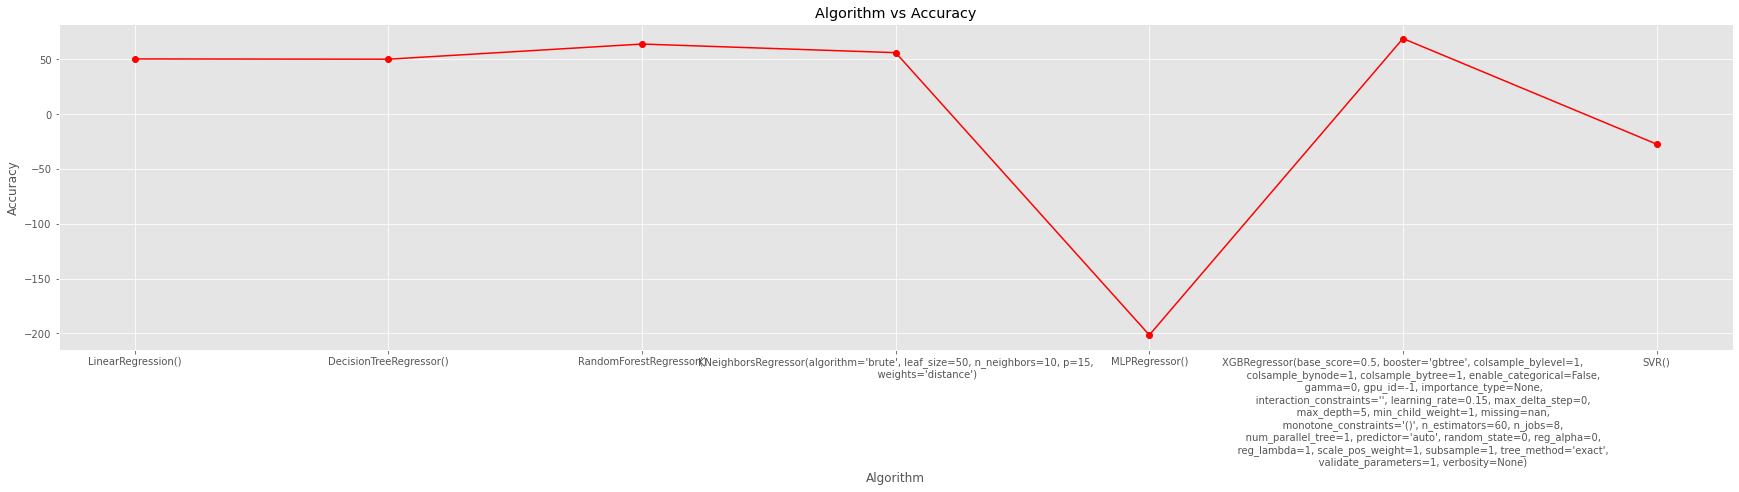

In [15]:
# make graph about Accuracy

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()

In [16]:
XGB_model=XGBRegressor(n_estimators=60,max_depth=5,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.15)

# fit model

XGB_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", XGB_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", XGB_model.score(X_test,y_test))

# Expected value Y using X test
y_predXGB=XGB_model.predict(X_test)

# Model Evaluation

print(" The Score XGB Regressor  Model " ,r2_score(y_test,y_predXGB))

Score the X-train with Y-train is :  0.9604049055844844
Score the X-test  with Y-test  is :  0.6896328898090509
 The Score XGB Regressor  Model  0.6896328898090509


/opt/homebrew/Caskroom/miniforge/base/envs/untitled/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/envs/untitled/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/envs/untitled/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
